## Predict Number of Pop in Food Desert

<br>y_test_std ≈ prediction , but need to scale back to normal value. Standard Scale
<br>REFERENCE: 21.01.Stu_Respiratory_Disease

In [1]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
read_df = pd.read_csv('ML_Input/ML_2010_CLEAN.csv', encoding='utf-8')

In [4]:
# read_df.columns

In [4]:
# Check data types
print(read_df.dtypes)
read_df.head()

GeoID            int64
Year             int64
D_Etab           int64
D_Emp            int64
D_Pay            int64
G_Etab           int64
G_Emp            int64
G_Pay            int64
Pop_2015         int64
FD_num_2015      int64
FD_pct_2015    float64
dtype: object


,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2015,FD_num_2015,FD_pct_2015
0,1001,2015,11,93,1703,5,283,5691,55035,17497,32.06
1,1003,2015,50,429,7054,30,1774,36515,203690,30561,16.77
2,1005,2015,8,60,844,4,159,2733,26270,6070,22.11
3,1007,2015,5,40,596,5,111,2497,22561,969,4.23
4,1015,2015,34,263,4461,29,832,15066,115285,27786,23.43


In [5]:
# read_df.describe()

,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2010,FD_num_2010,FD_pct_2010
count,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1.025000e+03,1.025000e+03,1025.000000,1025.000000
mean,30306.309268,2010.0,22.225366,195.934634,3311.138537,48.062439,1735.160976,3.783641e+04,2.208652e+05,43177.937561,19.748829
std,15029.018414,0.0,38.984258,354.125293,6505.341165,139.541954,3981.375967,9.409740e+04,5.100768e+05,76344.818328,11.021902
min,1003.000000,2010.0,3.000000,11.000000,136.000000,3.000000,55.000000,5.540000e+02,3.145000e+03,0.000000,0.000000
25%,18109.000000,2010.0,7.000000,55.000000,877.000000,7.000000,223.000000,3.887000e+03,3.600900e+04,4651.000000,12.010000
50%,31039.000000,2010.0,12.000000,97.000000,1588.000000,14.000000,513.000000,9.347000e+03,7.508700e+04,13186.000000,19.230000
75%,42049.000000,2010.0,22.000000,204.000000,3394.000000,34.000000,1521.000000,3.102900e+04,1.950850e+05,46747.000000,26.990000
max,56025.000000,2010.0,583.000000,7272.000000,142094.000000,2024.000000,70433.000000,1.821874e+06,9.818605e+06,886069.000000,83.160000


In [6]:
# read_df.corr()

,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2010,FD_num_2010,FD_pct_2010
GeoID,1.000000,NaN,-0.045838,-0.073007,-0.074354,-0.059562,-0.083869,-0.101377,-0.089573,-0.058382,-0.043349
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Etab,-0.045838,NaN,1.000000,0.930330,0.920129,0.883000,0.871912,0.841913,0.910185,0.713886,-0.001033
D_Emp,-0.073007,NaN,0.930330,1.000000,0.995133,0.811781,0.920554,0.912567,0.953494,0.758726,0.023505
D_Pay,-0.074354,NaN,0.920129,0.995133,1.000000,0.819721,0.922699,0.920670,0.956232,0.732831,0.012956
G_Etab,-0.059562,NaN,0.883000,0.811781,0.819721,1.000000,0.820343,0.822959,0.859720,0.540874,-0.089234
G_Emp,-0.083869,NaN,0.871912,0.920554,0.922699,0.820343,1.000000,0.988867,0.980219,0.806986,0.005154
G_Pay,-0.101377,NaN,0.841913,0.912567,0.920670,0.822959,0.988867,1.000000,0.979604,0.778965,-0.007046
Pop_2010,-0.089573,NaN,0.910185,0.953494,0.956232,0.859720,0.980219,0.979604,1.000000,0.784415,-0.007839
FD_num_2010,-0.058382,NaN,0.713886,0.758726,0.732831,0.540874,0.806986,0.778965,0.784415,1.000000,0.269071


### Plots to see value distribution and correlations

In [97]:
## Show matrix of scatter plot data for quick overview
# from pandas.plotting import scatter_matrix
# scatter_matrix(read_df.iloc[:, 2:-1])
# plt.figure(figsize=(20,10))
# plt.show()

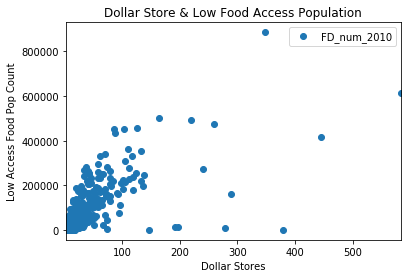

<Figure size 1440x720 with 0 Axes>

In [7]:
# Plot correlation between Dollar Stores & Pop with Low Access to food
read_df.plot(x='D_Etab', y='FD_num_2010', style='o')  
plt.title('Dollar Store & Low Food Access Population')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Strong correlation when Dollar Store numbers are under 150
# Similar for 2010 & 2015

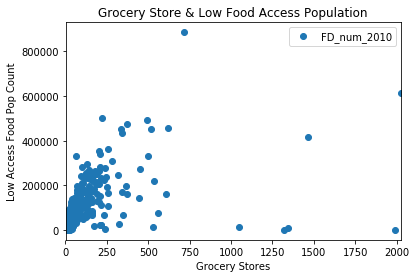

<Figure size 1440x720 with 0 Axes>

In [26]:
# Plot Grocery Stores &  Pop with Low Access to food
read_df.plot(x='G_Etab', y='FD_num_2010', style='o')  
plt.title('Grocery Store & Low Food Access Population')  
plt.xlabel('Grocery Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Why is this not a negative correlation?
# 2015 slightly steeper and condensed. Higher coefficient with less variant

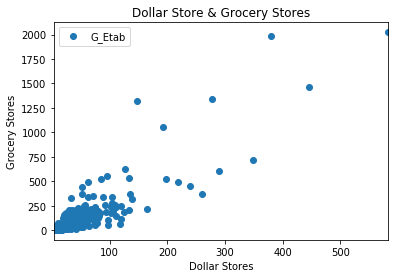

<Figure size 1440x720 with 0 Axes>

In [9]:
# Plot Grocery Stores &  Pop with Low Access to food
read_df.plot(x='D_Etab', y='G_Etab', style='o')  
plt.title('Dollar Store & Grocery Stores')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Grocery Stores')
plt.figure(figsize=(20,10))
plt.show()

# Why is this not a negative correlation?
# Similar for 2010 & 2015

In [27]:
read_df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay',
       'Pop_2015', 'FD_num_2015', 'FD_pct_2015'],
      dtype='object')

### Train model & Set Target
#### Predict: Percentage of pop w/ low access to food

In [13]:
# Select columns for machine learning processing
mldf = read_df[['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab','G_Emp', 'G_Pay',
       'Pop_2010', 'FD_num_2010']]
# mldf = read_df.iloc[:, 2:] # Use all columns
mldf.head()

,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2010,FD_num_2010
0,37,271,5046,25,1190,25820,182265,35211
1,30,207,3464,24,734,12338,118572,30901
2,9,66,983,8,200,3634,34215,6748
3,9,43,755,4,114,1612,25989,79
4,15,158,2467,7,252,4142,25833,5061


In [14]:
# REFERENCE: 21.01.Stu_Respiratory_Disease
# Assign X (data) & y (target)

X = mldf.drop("FD_num_2010", axis=1) # drop target feature column
y = mldf["FD_num_2010"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1025, 7) (1025, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler= StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

/Users/bic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Users/bic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# Create Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
predictions = model.predict(X_test_std)
model.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

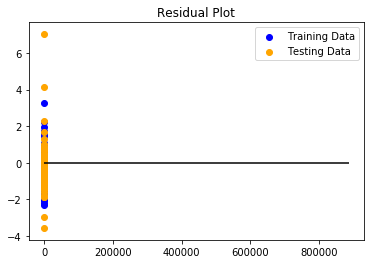

In [20]:
# Plot data selection
plt.scatter(model.predict(X_train_std), model.predict(X_train_std) - y_train_std, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_std), model.predict(X_test_std) - y_test_std, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_std, predictions)
r2 = model.score(X_test_std, y_test_std)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

# 2015 Comparison
# Good MSE = 0. Good R2 = 1.
# MSE: 0.3304529371780043, R2: 0.6479262717877914

# 2010 Comparison
# MSE: 0.418649717790164, R2: 0.5060741987745555

MSE: 0.418649717790164, R2: 0.5060741987745555


In [22]:
training_score = model.score(X_train_std, y_train_std)
testing_score = model.score(X_test_std, y_test_std)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# 2015 Comparison
# Training Score: 0.795739359424537
# Testing Score: 0.6479262717877914

# 2010 Comparison
# Training Score: 0.8328314038713747
# Testing Score: 0.5060741987745555

Training Score: 0.8328314038713747
Testing Score: 0.5060741987745555


In [23]:
print('Columns:', X.columns)
print('Weight coefficients: ', (model.coef_).round(2))
print('y-axis intercept: ', model.intercept_.round(2))

#Comparison
# 2015 y-axis intercept:  [0.]
# 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay', 'Pop_2010'
#   0.28     0.98    -1.29      -0.59     1.86   -1.43      0.88      Year: 2015
#   0.06     2.78    -3.14      -0.45     1.66   -1.01      0.86      Year: 2010
# 2010 y-axis intercept:  [-0.]

Columns: Index(['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay', 'Pop_2010'], dtype='object')
Weight coefficients:  [[ 0.06  2.78 -3.14 -0.45  1.66 -1.01  0.86]]
y-axis intercept:  [-0.]


In [28]:
predictions.round()

array([[ 3.],
       [ 0.],
       [-0.],
       [-1.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 1.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
      

In [29]:
y_test_std.round()

array([[ 2.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 1.],
       [-0.],
       [-1.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [-1.],
       [ 1.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 1.],
       [-1.],
       [-0.],
       [-1.],
       [-1.],
       [-1.],
       [-0.],
       [-0.],
       [ 0.],
       [-1.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 1.],
       [-0.],
       [-1.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [-1.],
       [-1.],
       [-0.],
       [ 1.],
       [-0.],
       [-1.],
       [-1.],
       [-0.],
      